In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data from excel file into dataframe
stations_aggregates = pd.read_excel("./weather_data/stations_aggregates.xlsx", index_col=0)

# view dataframe
stations_aggregates

,max tmax (degC),min tmin (degC),max af (days),max rain (mm),max sun (hours)
aberporth,22.4,-3.5,26,232.3,342.1
armagh,23.8,-4.2,27,226.4,256.0
ballypatrick,20.0,-1.8,22,313.0,279.3
bradford,24.8,-4.9,28,266.8,300.1
braemar,22.1,-8.6,31,316.8,265.2
camborne,22.5,-0.8,19,276.7,308.4
cambridge,28.3,-5.7,29,166.2,289.6
cardiff,26.0,-3.4,27,267.6,305.4
chivenor,25.0,-2.5,22,233.0,336.8
cwmystwyth,23.2,-4.9,27,425.4,260.2


In [3]:
# add latitude and region columns to dataframe
stations_aggregates['lat'] = ''
stations_aggregates['region'] = ''

In [4]:
# fetch latitude data from text data files of stations
for station in stations_aggregates.index:
    with open("./weather_data/" + station + "data.txt") as f:
        lines = f.readlines(300)
    if "Lat" in lines[1]:
        stations_aggregates.at[station,'lat'] = lines[1][lines[1].index("Lat")+4:lines[1].index("Lat")+10]
    elif "Lat" in lines[2]:
        stations_aggregates.at[station,'lat'] = lines[2][lines[2].index("Lat")+4:lines[2].index("Lat")+10]

# convert latitude values to floats
stations_aggregates['lat'] = np.array(stations_aggregates['lat']).astype(np.float)

In [5]:
# derive region values from latitude data
for station in stations_aggregates.index:
    if stations_aggregates.at[station,'lat'] >= 49.900 and stations_aggregates.at[station,'lat'] <= 53.566:
        stations_aggregates.at[station,'region'] = 'southern'
    elif stations_aggregates.at[station,'lat'] >= 53.567 and stations_aggregates.at[station,'lat'] <= 57.232:
        stations_aggregates.at[station,'region'] = 'central'
    elif stations_aggregates.at[station,'lat'] >= 57.233 and stations_aggregates.at[station,'lat'] <= 60.900:
        stations_aggregates.at[station,'region'] = 'northern'

# view updated dataframe
stations_aggregates

,max tmax (degC),min tmin (degC),max af (days),max rain (mm),max sun (hours),lat,region
aberporth,22.4,-3.5,26,232.3,342.1,52.139,southern
armagh,23.8,-4.2,27,226.4,256.0,54.352,central
ballypatrick,20.0,-1.8,22,313.0,279.3,55.181,central
bradford,24.8,-4.9,28,266.8,300.1,53.813,central
braemar,22.1,-8.6,31,316.8,265.2,57.006,central
camborne,22.5,-0.8,19,276.7,308.4,50.218,southern
cambridge,28.3,-5.7,29,166.2,289.6,52.245,southern
cardiff,26.0,-3.4,27,267.6,305.4,51.488,southern
chivenor,25.0,-2.5,22,233.0,336.8,51.089,southern
cwmystwyth,23.2,-4.9,27,425.4,260.2,52.358,southern


========Plots of the three regions========


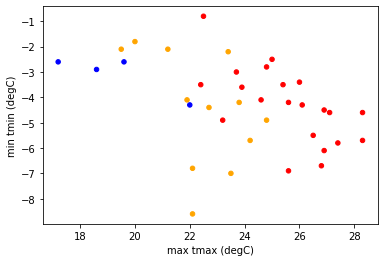

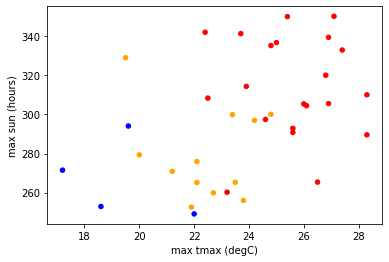

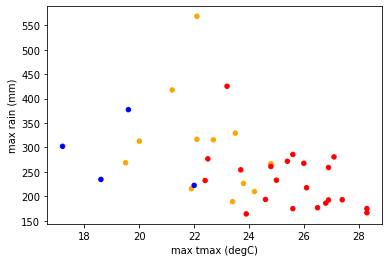

In [6]:
# plot staions data based on 'max tmax' and 'min tmin' (color coded for different regions)
print('========Plots of the three regions========')
df = stations_aggregates
tmax_tmin = df[['max tmax (degC)','min tmin (degC)', 'region']]
tmax_tmin.columns = ['max tmax (degC)','min tmin (degC)','region']
color_dict = {'northern':'blue',
             'central':'orange',
             'southern':'red'}
tmax_tmin['color'] = tmax_tmin['region'].apply(lambda x:color_dict[x])
tmax_tmin.plot.scatter(x='max tmax (degC)',y='min tmin (degC)',c=tmax_tmin['color'])

# plot staions data based on 'max tmax' and 'max sun' (color coded for different regions)
tmax_sun = df[['max tmax (degC)','max sun (hours)', 'region']]
tmax_sun.columns = ['max tmax (degC)','max sun (hours)','region']
tmax_sun['color'] = tmax_sun['region'].apply(lambda x:color_dict[x])
tmax_sun.plot.scatter(x='max tmax (degC)',y='max sun (hours)',c=tmax_sun['color'])

# plot staions data based on 'max tmax' and 'max rain' (color coded for different regions)
tmax_rain = df[['max tmax (degC)','max rain (mm)', 'region']]
tmax_rain.columns = ['max tmax (degC)','max rain (mm)','region']
tmax_rain['color'] = tmax_rain['region'].apply(lambda x:color_dict[x])
tmax_rain.plot.scatter(x='max tmax (degC)',y='max rain (mm)',c=tmax_rain['color'])

======== X_train ======== 

 [[24.8 -2.8]
 [22.1 -6.8]
 [18.6 -2.9]
 [23.2 -4.9]
 [21.2 -2.1]
 [23.9 -3.6]
 [26.  -3.4]
 [28.3 -4.6]
 [22.  -4.3]
 [22.4 -3.5]
 [21.9 -4.1]
 [26.1 -4.3]
 [27.4 -5.8]
 [25.6 -6.9]
 [19.6 -2.6]
 [26.9 -6.1]
 [17.2 -2.6]
 [25.4 -3.5]
 [25.  -2.5]
 [19.5 -2.1]
 [22.5 -0.8]
 [23.4 -2.2]
 [26.9 -4.5]
 [22.1 -8.6]
 [22.7 -4.4]
 [24.2 -5.7]
 [23.5 -7. ]
 [28.3 -5.7]
 [23.7 -3. ]] 



======== y_train ======== 

                 region
eastbourne    southern
eskdalemuir    central
wickairport   northern
cwmystwyth    southern
dunstaffnage   central
lowestoft     southern
cardiff       southern
heathrow      southern
nairn         northern
aberporth     southern
leuchars       central
waddington    southern
oxford        southern
shawbury      southern
stornoway     northern
hurn          southern
lerwick       northern
manston       southern
chivenor      southern
tiree          central
camborne      southern
whitby         central
yeovilton     southern
braemar 

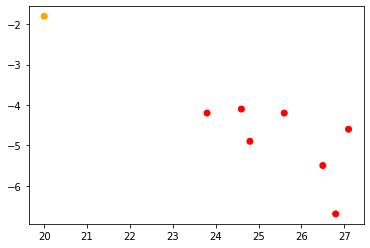




======== plot of actual class labels ========


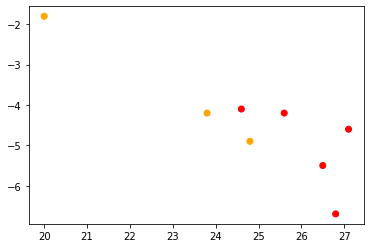

In [7]:
# Classification 1
# classify regions based on tmax and tmin features
df = stations_aggregates
X = df[['max tmax (degC)','min tmin (degC)']].to_numpy()
y = df[['region']]

# create classifier and set value of k and distance metric (note: k and metric can be varied)
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'======== X_train ======== \n\n {X_train} \n\n\n')
print(f'======== y_train ======== \n\n {y_train} \n\n\n')
print(f'======== X_test ======== \n\n {X_test} \n\n\n')
print(f'======== y_test ======== \n\n {y_test} \n\n\n')

# train the classifier
classifier.fit(X_train, y_train)

# predict regions
pred = classifier.predict(X_test)
print(f'======== predicted class labels ======== \n\n {pred} \n\n\n')

# calculate accuracy score
print(f'======== accuracy score ======== \n\n {accuracy_score(y_test, pred)} \n\n\n')

# plot predicted class labels and actual class labels
print('======== plot of predicted class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=pd.Series(pred).apply(lambda x:color_dict[x]))
plt.show()

print('\n\n\n======== plot of actual class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test.squeeze().apply(lambda x:color_dict[x]))
plt.show()

======== X_train ======== 

 [[ 26.8 320.1]
 [ 20.  279.3]
 [ 23.2 260.2]
 [ 28.3 310.1]
 [ 25.  336.8]
 [ 25.4 350.1]
 [ 27.4 333. ]
 [ 25.6 292.9]
 [ 26.9 305.6]
 [ 23.9 314.4]
 [ 28.3 289.6]
 [ 18.6 252.9]
 [ 23.4 299.9]
 [ 21.9 252.6]
 [ 24.2 297. ]
 [ 22.4 342.1]
 [ 21.2 270.9]
 [ 27.1 350.3]
 [ 22.5 308.4]
 [ 19.6 294.1]
 [ 26.9 339.5]
 [ 17.2 271.5]
 [ 22.1 275.9]
 [ 22.7 259.9]
 [ 26.  305.4]
 [ 25.6 290.8]
 [ 23.7 341.4]
 [ 22.1 265.2]
 [ 23.5 265.3]] 



======== y_train ======== 

                 region
rossonwye     southern
ballypatrick   central
cwmystwyth    southern
heathrow      southern
chivenor      southern
manston       southern
oxford        southern
shawbury      southern
yeovilton     southern
lowestoft     southern
cambridge     southern
wickairport   northern
whitby         central
leuchars       central
durham         central
aberporth     southern
dunstaffnage   central
southampton   southern
camborne      southern
stornoway     northern
hurn          south

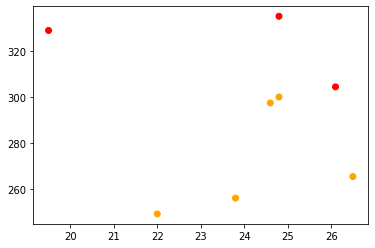




======== plot of actual class labels ========


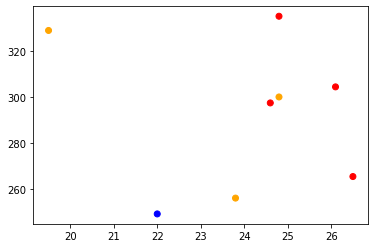

In [8]:
# Classification 2
# classify regions based on tmax and sun features
df = stations_aggregates
X = df[['max tmax (degC)','max sun (hours)']].to_numpy()
y = df[['region']]

# create classifier and set value of k and distance metric (note: k and metric can be varied)
classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski')

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'======== X_train ======== \n\n {X_train} \n\n\n')
print(f'======== y_train ======== \n\n {y_train} \n\n\n')
print(f'======== X_test ======== \n\n {X_test} \n\n\n')
print(f'======== y_test ======== \n\n {y_test} \n\n\n')

# train the classifier
classifier.fit(X_train, y_train)

# predict regions
pred = classifier.predict(X_test)
print(f'======== predicted class labels ======== \n\n {pred} \n\n\n')

# calculate accuracy score
print(f'======== accuracy score ======== \n\n {accuracy_score(y_test, pred)} \n\n\n')

# plot predicted class labels and actual class labels
print('======== plot of predicted class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=pd.Series(pred).apply(lambda x:color_dict[x]))
plt.show()

print('\n\n\n======== plot of actual class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test.squeeze().apply(lambda x:color_dict[x]))
plt.show()

======== X_train ======== 

 [[ 24.8  -4.9 300.1 266.8]
 [ 24.8  -2.8 335.3 261.1]
 [ 22.1  -8.6 265.2 316.8]
 [ 23.7  -3.  341.4 254.2]
 [ 28.3  -5.7 289.6 166.2]
 [ 25.   -2.5 336.8 233. ]
 [ 25.6  -6.9 292.9 174.7]
 [ 25.6  -4.2 290.8 285.6]
 [ 26.8  -6.7 320.1 186. ]
 [ 27.4  -5.8 333.  192.9]
 [ 22.1  -6.8 275.9 568.8]
 [ 23.9  -3.6 314.4 163.9]
 [ 26.9  -4.5 305.6 192.4]
 [ 23.5  -7.  265.3 329.4]
 [ 27.1  -4.6 350.3 280.7]
 [ 18.6  -2.9 252.9 234.6]
 [ 26.5  -5.5 265.4 176.5]
 [ 20.   -1.8 279.3 313. ]
 [ 22.5  -0.8 308.4 276.7]
 [ 17.2  -2.6 271.5 302.4]
 [ 25.4  -3.5 350.1 271.8]
 [ 24.6  -4.1 297.5 193.6]
 [ 26.1  -4.3 304.5 217.5]
 [ 19.6  -2.6 294.1 377.5]
 [ 28.3  -4.6 310.1 174.8]
 [ 23.8  -4.2 256.  226.4]
 [ 26.9  -6.1 339.5 258.9]
 [ 23.4  -2.2 299.9 189. ]
 [ 24.2  -5.7 297.  209.7]] 



======== y_train ======== 

                    region
bradford          central
eastbourne       southern
braemar           central
valley           southern
cambridge        souther

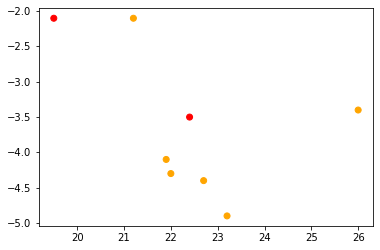




======== plot of actual class labels ========


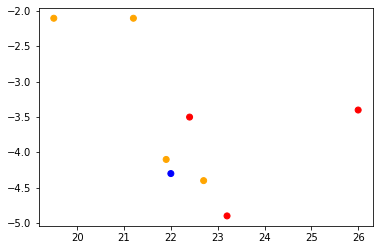

In [9]:
# Classification 3
# classify regions based on tmax, tmin, sun, and rain features
df = stations_aggregates
X = df[['max tmax (degC)','min tmin (degC)','max sun (hours)','max rain (mm)']].to_numpy()
y = df[['region']]

# create classifier and set value of k and distance metric (note: k and metric can be varied)
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'======== X_train ======== \n\n {X_train} \n\n\n')
print(f'======== y_train ======== \n\n {y_train} \n\n\n')
print(f'======== X_test ======== \n\n {X_test} \n\n\n')
print(f'======== y_test ======== \n\n {y_test} \n\n\n')

# train the classifier
classifier.fit(X_train, y_train)

# predict regions
pred = classifier.predict(X_test)
print(f'======== predicted class labels ======== \n\n {pred} \n\n\n')

# calculate accuracy score
print(f'======== accuracy score ======== \n\n {accuracy_score(y_test, pred)} \n\n\n')

# plot predicted class labels and actual class labels
print('======== plot of predicted class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=pd.Series(pred).apply(lambda x:color_dict[x]))
plt.show()

print('\n\n\n======== plot of actual class labels ========')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test.squeeze().apply(lambda x:color_dict[x]))
plt.show()